<a href="https://colab.research.google.com/github/khuramgill/Ai-Labs/blob/main/Ai_Lab_6_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 1:Customer Purchasing Behavior Analysis**

**Generate Dummy Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42) 

n = 1000 
data = {
    'CustomerID': np.arange(1, n + 1),
    'Age': np.random.randint(18, 71, size=n),
    'AnnualIncome': np.random.randint(20000, 120001, size=n),
    'Gender': np.random.choice(['Male', 'Female'], size=n),
    'Purchased': np.random.choice([0, 1], size=n)
}

df = pd.DataFrame(data)


**Explore and Inspect the Data**

In [ ]:

print("First 10 rows of the dataset:")
print(df.head(10))

print("\nChecking for missing values:")
print(df.isnull().sum())


First 10 rows of the dataset:
   CustomerID  Age  AnnualIncome  Gender  Purchased
0           1   56         20302  Female          1
1           2   69        102558  Female          0
2           3   46         20055  Female          0
3           4   32         28717  Female          1
4           5   60         48699    Male          1
5           6   25         93686  Female          0
6           7   38         87661    Male          1
7           8   56         64247    Male          1
8           9   36         36748    Male          0
9          10   40         24621    Male          0

Checking for missing values:
CustomerID      0
Age             0
AnnualIncome    0
Gender          0
Purchased       0
dtype: int64


**Handling Missing Data**

In [ ]:

df.loc[np.random.randint(0, n, size=20), 'AnnualIncome'] = np.nan
print("\nMissing values after introducing some:")
print(df.isnull().sum())
df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)
print("\nMissing values after filling:")
print(df.isnull().sum())



Missing values after introducing some:
CustomerID       0
Age              0
AnnualIncome    20
Gender           0
Purchased        0
dtype: int64

Missing values after filling:
CustomerID      0
Age             0
AnnualIncome    0
Gender          0
Purchased       0
dtype: int64


<ipython-input-4-28baaccb810b>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)


**Encoding Categorical Data**

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
print("\nAfter encoding 'Gender' column:")
print(df.head())



After encoding 'Gender' column:
   CustomerID  Age  AnnualIncome  Gender  Purchased
0           1   56       20302.0       1          1
1           2   69      102558.0       1          0
2           3   46       20055.0       1          0
3           4   32       28717.0       1          1
4           5   60       48699.0       0          1


**Feature Scaling**

In [ ]:
scaler = MinMaxScaler()
df[['Age', 'AnnualIncome']] = scaler.fit_transform(df[['Age', 'AnnualIncome']])
print("\nAfter feature scaling 'Age' and 'AnnualIncome':")
print(df.head())



After feature scaling 'Age' and 'AnnualIncome':
   CustomerID       Age  AnnualIncome  Gender  Purchased
0           1  0.730769      0.002472       1          1
1           2  0.980769      0.825600       1          0
2           3  0.538462      0.000000       1          0
3           4  0.269231      0.086680       1          1
4           5  0.807692      0.286638       0          1


**Data Visualization**

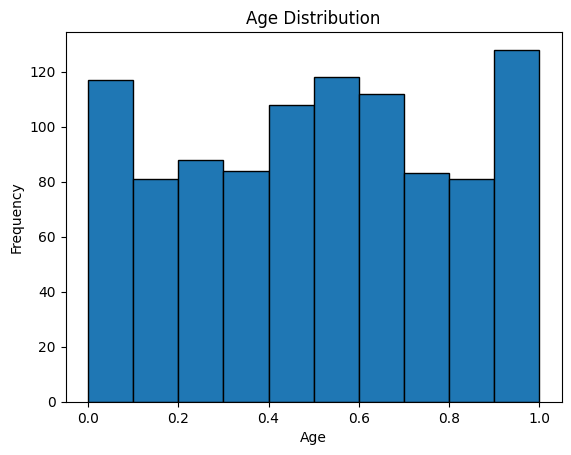

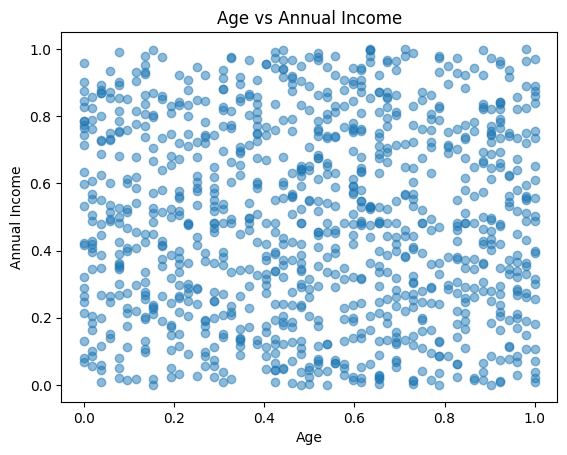

In [ ]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()
plt.scatter(df['Age'], df['AnnualIncome'], alpha=0.5)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()


**Correlation Analysis**

In [ ]:
print("\nCorrelation Matrix:")
print(df[['Age', 'AnnualIncome', 'Purchased']].corr())



Correlation Matrix:
                   Age  AnnualIncome  Purchased
Age           1.000000     -0.018154   0.008258
AnnualIncome -0.018154      1.000000  -0.007249
Purchased     0.008258     -0.007249   1.000000


**Feature Engineering**

In [ ]:
df['IncomePerAge'] = df['AnnualIncome'] / df['Age']
print("\nAfter creating 'IncomePerAge':")
print(df.head())



After creating 'IncomePerAge':
   CustomerID       Age  AnnualIncome  Gender  Purchased  IncomePerAge
0           1  0.730769      0.002472       1          1      0.003382
1           2  0.980769      0.825600       1          0      0.841788
2           3  0.538462      0.000000       1          0      0.000000
3           4  0.269231      0.086680       1          1      0.321954
4           5  0.807692      0.286638       0          1      0.354885


**Prepare Data for Modeling**

In [ ]:
df = df.drop(columns=['CustomerID'])
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)



Shape of training data: (800, 4)
Shape of testing data: (200, 4)
